<font color="#09D8B9"><h1><b>EDA (Exploratory Data Analysis)</b></h1></font>

## Overview

<font color="black">Our goal is to <b>decipher the complexities and unearth the intricacies</b> of our data, leveraging advanced tools such as <b>Python notebooks for interactive coding, SQL databases for structured data storage, and PowerBi for dynamic visualizations</b>. This multifaceted approach allows us to tackle data from various angles, ensuring a comprehensive analysis.</font>

The initial condition of our dataset was notably suboptimal, laden with inconsistencies and anomalies. This necessitated a rigorous pre-cleaning phase, a crucial step to prepare the data for accurate analysis. By cleansing the data before loading it into a dataframe and subsequently migrating it to a SQL database, we establish a solid foundation for reliable insights.

The source of our data is <b>real-world company records</b>, which presents its unique challenges. These records were originally contained in Excel files, characterized by non-standard structures and formats. This diversity necessitates a flexible and robust approach to data processing and integration.

## Data Structure

As we delve into the dataset, we have identified four primary tables that constitute the core of our analysis. Each table serves a distinct purpose, reflecting different aspects of the company's operations:

1. <font color="blue">`ins_programadas`</font> (Scheduled Inspections): This table catalogs all planned inspection activities. Scheduled inspections are critical for maintaining regulatory compliance and ensuring operational safety. By analyzing this data, we can identify patterns in inspection scheduling, compliance rates, and potential areas for process improvement.

2. <font color="blue">`ins_no_programados`</font> (Unscheduled Inspections): In contrast, this table tracks inspections that occur outside the regular schedule, often triggered by unexpected events or concerns. Analysis of unscheduled inspections can provide insights into reactive maintenance needs, unforeseen operational issues, and the effectiveness of the existing inspection regime.

3. <font color="blue">`act_programadas`</font> (Scheduled Activities): This table focuses on the planned activities within the organization, encompassing a wide range of operations from routine maintenance to strategic initiatives. Understanding scheduled activities offers a glimpse into the company's operational planning, resource allocation, and priorities.

4. <font color="blue">`act_no_programadas`</font> (Unscheduled Activities): Lastly, this table captures activities that were not part of the original plan, reflecting the organization's adaptability and response to emergent needs. Analyzing these activities sheds light on the company's agility, the efficiency of its response mechanisms, and areas where flexibility may be improved or is particularly effective.

This enriched explanation aims to provide a deeper understanding of each component's significance within the Exploratory Data Analysis process, highlighting the comprehensive and dynamic nature of working with real-world data.


---

<font color="#09D825"><h4>Preprocess Stage: Detailed Library Overview</h4></font>

1. **Custom Library Integration:**
    - **Sys Path Configuration**: The command `import sys; sys.path.append(r"../Application")` is crucial for including custom libraries or modules into the Python path. This allows Python to locate and import custom modules stored in the specified directory, enabling seamless integration of project-specific functionalities.
    
    - **Pysqlconnect**: Represents a bespoke module designed for database connections. This custom library simplifies the process of connecting to, interacting with, and managing SQL database operations, tailored specifically to the project's requirements.

2. **Configuration Management:**
    - **Decouple**: By using `from decouple import config`, the project leverages the 'decouple' library to separate configuration variables (such as database credentials or secret keys) from the source code. This practice enhances security and allows for different configurations across development and production environments without the need to alter the code.

3. **External Python Libraries:**
    - **Matplotlib**: With `import matplotlib.pyplot as plt`, the project utilizes 'matplotlib' for creating a wide range of static, animated, and interactive visualizations. This library is particularly useful for generating plots, charts, and figures that facilitate data analysis.
    
    - **NumPy**: Through `import numpy as np`, the library 'NumPy' is employed for its extensive support for large, multi-dimensional arrays and matrices, along with a vast collection of mathematical functions to operate on these arrays, making it a cornerstone for scientific computing in Python.
    
    - **Pandas**: The command `import pandas as pd` brings into play 'pandas', a library offering powerful data structures and tools for data manipulation and analysis, enabling efficient handling of tabular data with ease.

4. **Utility Libraries:**
    - **OS Module**: By `import os`, the project can utilize a variety of operating system dependent functionalities, such as file and directory operations, enhancing portability and flexibility in file management.
    
    - **Regular Expressions (Re)**: Utilizing `import re`, the project incorporates the 're' module for its capabilities in performing regular expression operations, crucial for text data preprocessing tasks like searching, matching, and splitting based on specific patterns.

In [60]:
import sys
sys.path.append(r"../Aplication")
import Pysqlconnect

In [61]:
from decouple import config
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import re

## `list_dtypes` Function

Returns the type of a pandas Series.

### Parameters
- `series`: `pd.Series` - The Series whose type is to be returned.

### Returns
- The type of the input `series`.

### Example
```python
import pandas as pd

# Creating a pandas Series
sample_series = pd.Series([1, 2, 3])
# Getting the type of the series
print(list_dtypes(sample_series))  # Output: <class 'pandas.core.series.Series'>


In [62]:
def list_dtypes(series:pd.Series):
    return type(series)

## `change_types` Function

Modifies data types based on the provided object. The exact changes and mechanisms depend on the implementation details not described in the comment.

### Parameters
- `dty`: `object` - The object based on which data types are to be changed. The specific role of this parameter depends on the function's internal logic.

### Returns
- The function's return type and value depend on its implementation, which is not detailed in the provided snippet.

### Example
```python
# Assuming change_types is defined to change data types in a specified way
result = change_types(some_object)
print(result)  # Output depends on the function's implementation and input.


## `load_query` Function

Generates a list of SQL queries to select all data from multiple tables. The function iterates over a predefined range to create queries for tables dynamically named according to a configuration setting.

### Returns
- `list` of `str`: A list containing SQL query strings for each table, formatted as `SELECT * FROM tablename`, where `tablename` is retrieved from the configuration using the `config` function.

### Example
```python
# Assuming the DB_TABLE1, DB_TABLE2, ..., DB_TABLE4 are configured table names
datasets = load_query() 
print(datasets)  
# Expected Output: ['SELECT * FROM table1', 'SELECT * FROM table2', ..., 'SELECT * FROM table4']


In [64]:
def load_query(): #create a function for iter the diferents tables
    lst = []
    for i in range(1,5):
        get_all_data = f"SELECT * FROM {config(f"DB_TABLE{i}")}"
        lst.append(get_all_data)
    return lst

datasets = load_query() 
print(datasets) #show the querys

['SELECT * FROM act_programadas', 'SELECT * FROM act_no_programadas', 'SELECT * FROM ins_no_programadas', 'SELECT * FROM ins_programadas']


In [93]:
def ist_duplicates(pdf):
    is_there_duplicates = pdf.duplicated().any()

    if is_there_duplicates:
        print("Yes there is")
    else:
        print("No all is good")


In [65]:
#define our datasets

df_ins_no = pd.read_sql(datasets[2],Pysqlconnect.connection())
df_ins = pd.read_sql(datasets[3],Pysqlconnect.connection())
df_act_no = pd.read_sql(datasets[1],Pysqlconnect.connection())
df_act = pd.read_sql(datasets[0],Pysqlconnect.connection())

In [66]:
dataframes = [df_ins_no, df_ins,df_act_no, df_act]

In [67]:
print(f"""
ins_programadas shape     {df_ins.shape}
ins_no_programadas sahpe  {df_ins_no.shape}

act_programadas  shape    {df_act.shape}
act_no_programadas shape  {df_act_no.shape}
""")
# print the number of entries for each dataset 


ins_programadas shape     (137912, 17)
ins_no_programadas sahpe  (250654, 16)

act_programadas  shape    (48428, 15)
act_no_programadas shape  (89369, 14)



We can see that we have around 400k rows betwen all tables

In [68]:
print(f"""
    ins_programadas shape     {df_ins.shape[0]}
    ins_no_programadas shape  {df_ins_no.shape[0]}

    act_programadas  shape    {df_act.shape[0]}
    act_no_programadas shape  {df_act_no.shape[0]}
    """)


    ins_programadas shape     137912
    ins_no_programadas shape  250654

    act_programadas  shape    48428
    act_no_programadas shape  89369
    


In [69]:
print(f"""
ins_programadas nulos     {df_ins.isnull().sum().sum()}
ins_no_programadas nulos  {df_ins_no.isnull().sum().sum()}

act_programadas nulos     {df_act.isnull().sum().sum()}
act_no_programadas nulos  {df_act_no.isnull().sum().sum()}
""")
#looking for null values


ins_programadas nulos     80747
ins_no_programadas nulos  84891

act_programadas nulos     41829
act_no_programadas nulos  11200



In [70]:
print("Nulls per column in df_ins_programadas:")
print(df_ins.isnull().sum())

print("\nNulls per column in df_ins_no_programadas:")
print(df_ins_no.isnull().sum())

print("\nNulls per column in df_act_programadas:")
print(df_act.isnull().sum())

print("\nNulls per column in df_act_no_programadas:")
print(df_act_no.isnull().sum())

#now we observe what columns have nulls and how much per each column


Nulls per column in df_ins_programadas:
Código centro          1300
Centro                 1300
Ubicac. técnica        1300
Denominación Ubic.     1300
Equipo                 1300
Denominación           1300
No. Plan               1300
Desc. Plan             1300
Orden                  1300
Actividad              1300
Descripción            1769
Clase de orden         1300
Status sistema         1300
Inicio program.        1354
Responsable           39168
Prioridad             21556
Duración               1300
dtype: int64

Nulls per column in df_ins_no_programadas:
Código centro          2415
Centro                 2415
Ubicac. técnica        2415
Denominación Ubic.     2415
Equipo                 2415
Denominación           2415
No. Plan               1300
Desc. Plan             1300
Orden                  1300
Actividad              1300
Descripción            1933
Clase de orden         1300
Status sistema         1300
Inicio program.        1758
Duración               1300
Priorid

- We can see that there are null values ​​present in several columns across all the datasets, which indicate that there are still many empty rows.
- The pattern of null data across the different columns indicates a consistency of errors, for example certain columns consistently have null values ​​which indicates problems with the collection.

In [71]:
df_act_no.keys()

Index(['Código centro', 'Centro', 'Ubicac. técnica', 'Denominación Ubic.',
       'Equipo', 'Denominación', 'No. Plan', 'Desc. Plan', 'Orden',
       'Actividad', 'Clase de orden', 'Status sistema', 'Inicio program.',
       'Duración'],
      dtype='object')

In [72]:
df_ins.keys()

Index(['Código centro', 'Centro', 'Ubicac. técnica', 'Denominación Ubic.',
       'Equipo', 'Denominación', 'No. Plan', 'Desc. Plan', 'Orden',
       'Actividad', 'Descripción', 'Clase de orden', 'Status sistema',
       'Inicio program.', 'Responsable', 'Prioridad', 'Duración'],
      dtype='object')

In [73]:
print("\nPrioridad column in df_act_programadas:")
print(df_act["Prioridad"].head(5))

print("\nPrioridad column in df_act_no_programadas:")
print(df_act_no["Prioridad"].head(5))


Prioridad column in df_act_programadas:


KeyError: 'Prioridad'

In [ ]:
# Define the minimum proportion of non-null values required (in this case, 50%)
threshold = len(df_ins.columns) // 2

# Remove rows with more than 50% null values 
df_ins = df_ins.dropna(thresh=threshold)

df_ins_no = df_ins_no.dropna(thresh=threshold)

df_act = df_act.dropna(thresh=threshold)

df_act_no = df_act_no.dropna(thresh=threshold)


In [ ]:
print("Nulls per column in df_ins_programadas:")
print(df_ins.isnull().sum())

print("\nNulls per column in df_ins_no_programadas:")
print(df_ins_no.isnull().sum())

print("\nNulls per column in df_act_programadas:")
print(df_act.isnull().sum())

print("\nNulls per column in df_act_no_programadas:")
print(df_act_no.isnull().sum())

Nulls per column in df_ins_programadas:
Código centro             0
Centro                    0
Ubicac. técnica           0
Denominación Ubic.        0
Equipo                    0
Denominación              0
No. Plan                  0
Desc. Plan                0
Orden                     0
Actividad                 0
Descripción             469
Clase de orden            0
Status sistema            0
Inicio program.          54
Responsable           37868
Prioridad             20256
Duración                  0
dtype: int64

Nulls per column in df_ins_no_programadas:
Código centro           1115
Centro                  1115
Ubicac. técnica         1115
Denominación Ubic.      1115
Equipo                  1115
Denominación            1115
No. Plan                   0
Desc. Plan                 0
Orden                      0
Actividad                  0
Descripción              633
Clase de orden             0
Status sistema             0
Inicio program.          458
Duración             

In [ ]:
print(f"""
    ins_programadas shape     {df_ins.shape[0]}
    ins_no_programadas shape  {df_ins_no.shape[0]}

    act_programadas  shape    {df_act.shape[0]}
    act_no_programadas shape  {df_act_no.shape[0]}
    """)


    ins_programadas shape     136612
    ins_no_programadas shape  249354

    act_programadas  shape    47670
    act_no_programadas shape  88607
    


the size doesn't change much after clean the rows with 50% of null values

In [ ]:
df_act_no.describe()
#see the distribution of our Numerical columns

,Código centro,Centro,Ubicac. técnica,Denominación Ubic.,Equipo,Denominación,No. Plan,Desc. Plan,Orden,Actividad,Clase de orden,Status sistema,Inicio program.,Duración,Prioridad,Responsable,
count,88545,88545,88607,88603,88607,88400,88436,88607,88607,88601,88611,88611,88575,88611,53242,28099,4
unique,34,20,185,81,2414,1586,3343,6142,22644,11847,7,48,293,95,17,447,2
top,0422,G. LUX PIEDECUESTA,0422-EQUIPOS AUXILIARES,EQUIPOS PARA SERVICIOS INDUSTRIALES,599576,LLENADORA,0,Mantenimiento de Inspector de botellas,13094217,Revisión estructura y oxido,PM02,ABIE,2023-12-07 05:00:00,"0,5",medio/Moderado,Alzate Wilmer,ENJUAGADORA
freq,13201,13201,3929,14996,1671,4093,4193,1671,191,776,79577,54631,6648,18834,15088,1218,3


In [ ]:
df_act.describe()

,Código centro,Centro,Ubicac. técnica,Denominación Ubic.,Equipo,Denominación,No. Plan,Desc. Plan,Orden,Actividad,Clase de orden,Status sistema,Inicio program.,Responsable,Prioridad,Duración
count,47608,47670,47670,47669,47573,47488,47670,47670,47666,47670,47670,47634,30308,34955,47670,69
unique,20,181,80,2096,1360,2952,4750,16529,9058,6,47,747,476,15,82,33
top,GASCOL SUR,0422-EQUIPOS AUXILIARES,EQUIPOS PARA SERVICIOS INDUSTRIALES,599576,LLENADORA,0,Mantenimiento de Inspector de botellas,13168250,REV Y/O CAMBIO FILTROS L ENVIO/R CIP,PM02,ABIE,2023-12-07 05:00:00,Alzate Wilmer,medio/Moderado,"0,5",PLAN DE MTTO MEC LAV BOTELLAS L1 900101
freq,7767,2344,7775,557,2576,1900,557,100,515,42740,27991,2484,1212,9981,8928,11


In [ ]:
df_ins_no.describe()

,Código centro,Centro,Ubicac. técnica,Denominación Ubic.,Equipo,Denominación,No. Plan,Desc. Plan,Orden,Actividad,Descripción,Clase de orden,Status sistema,Inicio program.,Duración,Responsable,Prioridad
count,248239,248239,248239,248239,248239,248239,249354,249354,249354,249354,248721,249354,249354,248896,249354,134268,193044
unique,22,19,175,76,2325,1602,1750,2365,26357,2077,5525,193,221,445,346,633,177
top,111,POSTOBÓN MALAMBO,0079-SALA DE JARABES,EQUIPOS PARA SERVICIOS INDUSTRIALES,829864,LLENADORA,25838,INSPECCION SEMANAL LLENADORA,0422-PLANTA DE AGUA ENVASADO,Inspeccion semanal,sin especificar,PM02,ABIE,2023-10-02 05:00:00,0.1,0,alto
freq,59360,59360,9951,45774,1008,6550,35716,1293,207,12555,5293,247469,142509,10575,12895,44188,72724


In [ ]:
df_ins.describe()

,Código centro,Centro,Ubicac. técnica,Denominación Ubic.,Equipo,Denominación,No. Plan,Desc. Plan,Orden,Actividad,Descripción,Clase de orden,Status sistema,Inicio program.,Responsable,Prioridad,Duración
count,136612,136612,136612,136612,136612,136612,136612,136612,136612,136612,136143,136612,136612,136558,98744,116356,136612
unique,19,19,168,75,2179,1507,1587,2133,19774,1852,5261,4,11,251,449,17,149
top,410,POSTOBÓN YUMBO,0079-SALA DE JARABES,EQUIPOS PARA SERVICIOS INDUSTRIALES,500001,LLENADORA,37845,INSPECCION SEMANAL LLENADORA,13126503,Inspeccion semanal,sin especificar,PM02,ABIE,2023-12-04 05:00:00,Carlos Jaramillo,medio/Moderado,0.1
freq,24185,24185,7239,27326,700,4081,6732,1102,90,7735,4971,136390,98702,5116,2966,26467,8317


In [ ]:
duracion_types = set(df_act_no["Duración"].apply(list_dtypes))
print(duracion_types)

{<class 'NoneType'>, <class 'str'>}


In [ ]:
#Now we look for which center has the most unscheduled activities.

In [96]:
#looking for duplicates
for i in dataframes:
    ist_duplicates(i)

Yes there is
Yes there is
Yes there is
Yes there is


In [105]:
for dataf in dataframes:
    dataf.drop_duplicates(inplace=True) # del all duplicates

In [106]:
for dataf in dataframes:
    ist_duplicates(dataf) 

No all is good
No all is good
No all is good
No all is good


In [80]:
df_act["Duración"] = pd.to_numeric(df_act["Duración"], errors='coerce')

In [83]:
print(set(df_act["Duración"].apply(list_dtypes)))

{<class 'float'>}


In [ ]:
df_act.head()

,Código centro,Centro,Ubicac. técnica,Denominación Ubic.,Equipo,Denominación,No. Plan,Desc. Plan,Orden,Actividad,Clase de orden,Status sistema,Inicio program.,Responsable,Duración
0,GASCOL CENTRO,0002-PLANTA DE AGUAS,EQUIPOS DE TRATAMIENTO DE AGUA DE ENVASA,70960858,PURIFICADOR CARBON 1,None,DESCARGUE CARGUE LECHO CARBON FILTRO 1,13106778,S.DESCARGUE CARGUE LECHO CARBON FILTRO 1,PM02,ABIE,2023-09-08 05:00:00,Pinilla Rubén,Medio,0
1,GASCOL CENTRO,0002-LINEA VASOS,LINEA PARA LLENADO DE VASOS,710128,LLENADORA DE VASOS,17353,P.LUBRICACION TRANSMISIONES,13105777,P.LUBRIC CRUZ MALTA,PM02,ABIE,2023-09-09 05:00:00,Gómez Hector,Medio,0.1
2,GASCOL CENTRO,0002-LINEA VASOS,LINEA PARA LLENADO DE VASOS,710128,LLENADORA DE VASOS,17353,P.LUBRICACION TRANSMISIONES,13105777,P.LUBRI PATINE BRONCE,PM02,ABIE,2023-09-09 05:00:00,Gómez Hector,Bajo,0.1
3,GASCOL CENTRO,0002-LINEA VASOS,LINEA PARA LLENADO DE VASOS,710128,LLENADORA DE VASOS,17353,P.LUBRICACION TRANSMISIONES,13105777,P.LUBRICA CADENA PASO,PM02,ABIE,2023-09-09 05:00:00,Gómez Hector,Muy elevado,0.1
4,GASCOL CENTRO,0002-LINEA VASOS,LINEA PARA LLENADO DE VASOS,710128,LLENADORA DE VASOS,17353,P.LUBRICACION TRANSMISIONES,13105777,P.LUBRICACION GUIAS Y PIÑONES,PM02,ABIE,2023-09-09 05:00:00,Gómez Hector,Alto,0.1


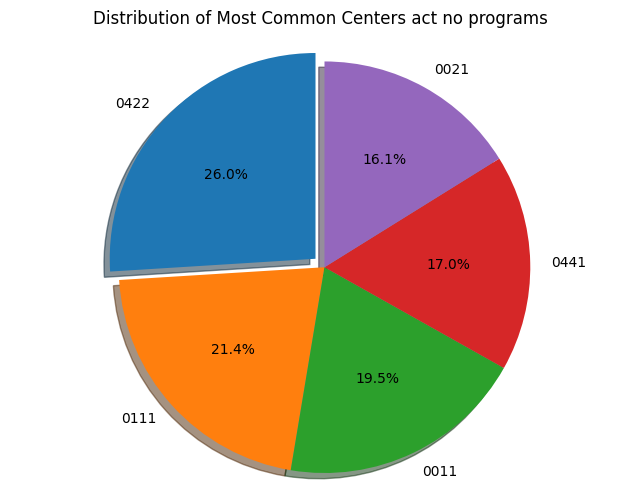

In [ ]:
import matplotlib.pyplot as plt

# calculate the frequency of each center
centro_counts = df_act_no['Código centro'].value_counts()

# obtain 5 most commun centers
top_centros = centro_counts.head(5)


plt.figure(figsize=(8, 6))
plt.pie(top_centros, labels=top_centros.index, autopct='%1.1f%%', startangle=90, explode=(0.06,0,0,0,0), shadow=True)
plt.title('Distribution of Most Common Centers act no programs')
plt.axis('equal') 
plt.show()

Thats is an interesting <font color=yellow>insight</font> here we can see what are the most commun centers with have no programing activities

C:\Users\joanm\AppData\Local\Temp\ipykernel_16596\3952444792.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_centros['Duración'] = pd.to_numeric(df_top_centros['Duración'], errors='coerce')


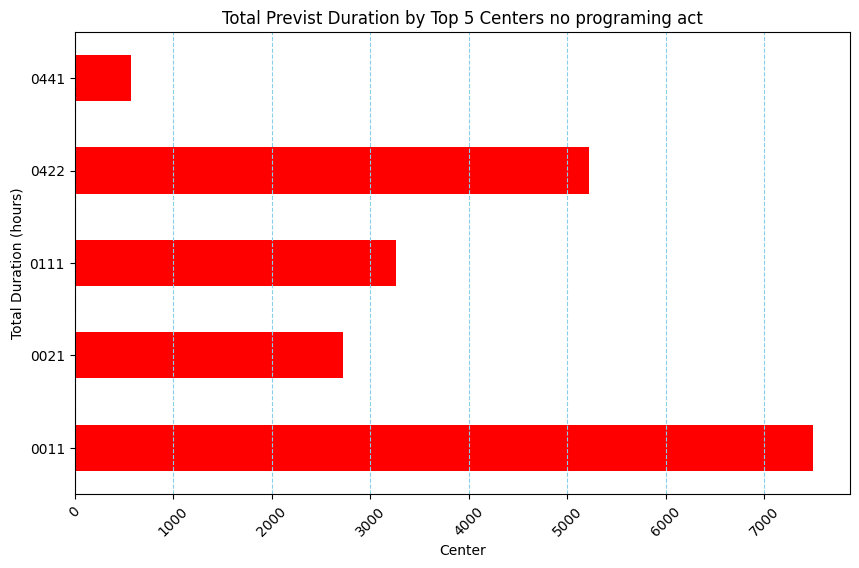

In [ ]:
# get the 5 commun centers
top_centros = df_act_no['Código centro'].value_counts().head(5).index.tolist()

# filter by top5 centers
df_top_centros = df_act_no[df_act_no['Código centro'].isin(top_centros)]

# transform the column to numeric
df_top_centros['Duración'] = pd.to_numeric(df_top_centros['Duración'], errors='coerce')

#group by 5 most commun centers
duration_by_centro = df_top_centros.groupby('Código centro')['Duración'].sum()


plt.figure(figsize=(10, 6))
duration_by_centro.plot(kind='barh', color="red")
plt.grid(True, axis="x", linestyle="--", color="skyblue")
plt.title('Total Previst Duration by Top 5 Centers no programing act')
plt.xlabel('Center')
plt.ylabel('Total Duration (hours)')
plt.xticks(rotation = 45)
plt.show()

C:\Users\joanm\AppData\Local\Temp\ipykernel_33144\3483092260.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_centros["Duración"] = pd.to_numeric(df_top_centros["Duración"], errors='coerce')


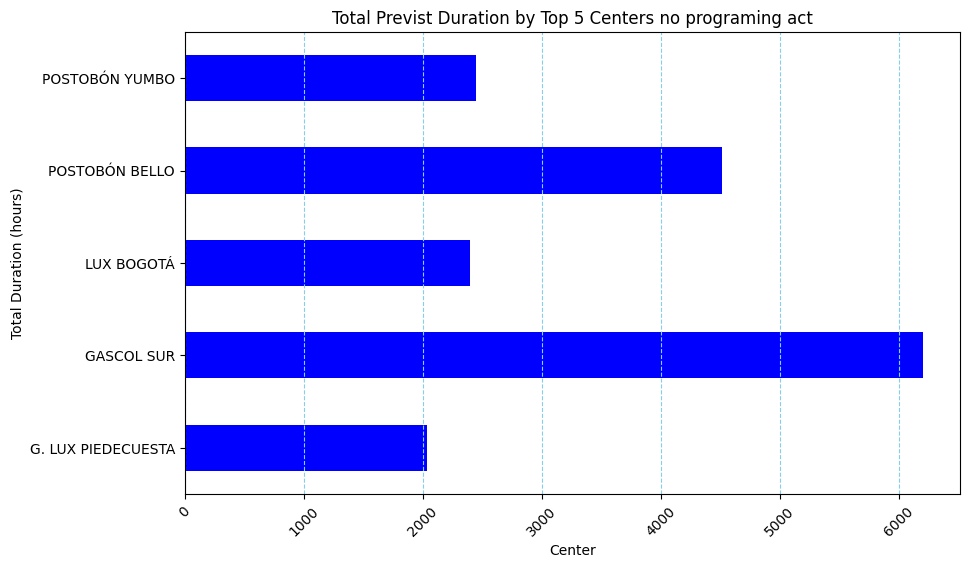

In [85]:
# get the 5 commun centers
top_centros = df_act['Código centro'].value_counts().head(5).index.tolist()

# filter by top5 centers
df_top_centros = df_act[df_act['Código centro'].isin(top_centros)]

# transform the column to numeric
df_top_centros["Duración"] = pd.to_numeric(df_top_centros["Duración"], errors='coerce')

#group by 5 most commun centers
duration_by_centro = df_top_centros.groupby('Código centro')["Duración"].sum()


plt.figure(figsize=(10, 6))
duration_by_centro.plot(kind='barh', color="blue")
plt.grid(True, axis="x", linestyle="--", color="skyblue")
plt.title('Total Previst Duration by Top 5 Centers no programing act')
plt.xlabel('Center')
plt.ylabel('Total Duration (hours)')
plt.xticks(rotation = 45)
plt.show()